In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Renaming Columns

In [10]:
df.rename(columns = {"race/ethnicity":"Race", "math score": "Math", "reading score":"Reading", "writing score": "Writing"}, inplace = True)
df.head()

,gender,Race,parental level of education,lunch,test preparation course,Math,Reading,Writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.rename(columns = {"parental level of education": "Parent_Edu", "gender": "Gender", "lunch": "Lunch", "test preparation course": "Test_Prep"}, inplace = True)
df.head()

,Gender,Race,Parent_Edu,Lunch,Test_Prep,Math,Reading,Writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Basic Analysis of Categorical Data

In [12]:
df["Gender"].value_counts()

female    518
male      482
Name: Gender, dtype: int64

- More females than males.

In [13]:
df["Race"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race, dtype: int64

- Most students belong to group C.

In [14]:
df["Parent_Edu"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parent_Edu, dtype: int64

- Most parents have completed some form of college education

In [15]:
df["Lunch"].value_counts()

standard        645
free/reduced    355
Name: Lunch, dtype: int64

- Most students do not get discount on Lunch.

In [16]:
df["Test_Prep"].value_counts()

none         642
completed    358
Name: Test_Prep, dtype: int64

- Most students do not take their studies seriously.
- Hypothesis = Students who have completed their test preparation should have a higher average than the ones who have not.

### Derived Metrices

#### Making a new column named "Average" that contains the average of the scores of Maths, Reading and Writing.

In [17]:
def fun(row):
    return float(row["Math"] + row["Reading"] + row["Writing"])/3

In [18]:
df["Average"] = df.apply(lambda row: fun(row), axis = 1)
df.head()

,Gender,Race,Parent_Edu,Lunch,Test_Prep,Math,Reading,Writing,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [19]:
df["Average"] = df["Average"].apply(lambda x: round(x, 2))
df.head()

,Gender,Race,Parent_Edu,Lunch,Test_Prep,Math,Reading,Writing,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [20]:
df.describe()

,Math,Reading,Writing,Average
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


- Students average 66 in Math, 69 in Reading and 68 in Writing
- Students whose parents have Master's and Associate's degree will have higher average than the rest. (Hypothesis)

In [25]:
df[df["Parent_Edu"] == "master's degree"]

,Gender,Race,Parent_Edu,Lunch,Test_Prep,Math,Reading,Writing,Average
2,female,group B,master's degree,standard,none,90,95,93,92.67
14,female,group A,master's degree,standard,none,50,53,58,53.67
18,male,group C,master's degree,free/reduced,completed,46,42,46,44.67
25,male,group A,master's degree,free/reduced,none,73,74,72,73.00
29,female,group D,master's degree,standard,none,62,70,75,69.00
32,female,group E,master's degree,free/reduced,none,56,72,65,64.33
79,female,group E,master's degree,standard,none,62,68,68,66.00
106,female,group D,master's degree,standard,none,87,100,100,95.67
128,male,group D,master's degree,standard,none,82,82,74,79.33
130,male,group D,master's degree,standard,none,89,84,82,85.00


In [26]:
df[df["Parent_Edu"] == "master's degree"].Average.mean()

73.5986440677966

In [27]:
df[df["Parent_Edu"] == "associate's degree"].Average.mean()

69.56896396396397

In [46]:
df[(df["Parent_Edu"] == "associate's degree") | (df["Parent_Edu"] == "master's degree")]

,Gender,Race,Parent_Edu,Lunch,Test_Prep,Math,Reading,Writing,Average
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
5,female,group B,associate's degree,standard,none,71,83,78,77.33
10,male,group C,associate's degree,standard,none,58,54,52,54.67
11,male,group D,associate's degree,standard,none,40,52,43,45.00
...,...,...,...,...,...,...,...,...,...
977,male,group C,associate's degree,standard,none,62,65,58,61.67
979,female,group C,associate's degree,standard,none,91,95,94,93.33
986,female,group C,associate's degree,standard,none,40,59,51,50.00
992,female,group D,associate's degree,free/reduced,none,55,76,76,69.00


In [43]:
df[(df["Parent_Edu"] == "associate's degree") | (df["Parent_Edu"] == "master's degree")].Average.mean()

70.41505338078292

In [44]:
df[(df["Parent_Edu"] != "associate's degree") | (df["Parent_Edu"] != "master's degree")]

,Gender,Race,Parent_Edu,Lunch,Test_Prep,Math,Reading,Writing,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


In [45]:
df[(df["Parent_Edu"] != "associate's degree") | (df["Parent_Edu"] != "master's degree")].Average.mean()

67.77057999999998

### Hypothesis is Verified
- Students whose parents have either an associate's or a master's degree have higher average than the ones who have not.

In [49]:
df[((df["Parent_Edu"] == "associate's degree") | (df["Parent_Edu"] == "master's degree")) & (df["Test_Prep"] == "completed")]

,Gender,Race,Parent_Edu,Lunch,Test_Prep,Math,Reading,Writing,Average
18,male,group C,master's degree,free/reduced,completed,46,42,46,44.67
35,male,group E,associate's degree,standard,completed,81,81,79,80.33
38,female,group D,associate's degree,free/reduced,completed,75,90,88,84.33
46,female,group A,associate's degree,standard,completed,55,65,62,60.67
48,female,group D,associate's degree,free/reduced,completed,57,74,76,69.00
...,...,...,...,...,...,...,...,...,...
928,male,group E,associate's degree,free/reduced,completed,46,43,44,44.33
932,male,group D,associate's degree,free/reduced,completed,61,71,73,68.33
934,male,group C,associate's degree,standard,completed,98,87,90,91.67
940,male,group C,master's degree,free/reduced,completed,72,66,72,70.00


In [50]:
df[((df["Parent_Edu"] == "associate's degree") | (df["Parent_Edu"] == "master's degree")) & (df["Test_Prep"] == "completed")].Average.mean()

75.20892156862745

# Data Visualization

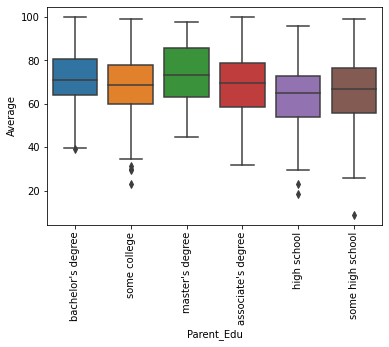

In [54]:
sns.boxplot(y = "Average", x = "Parent_Edu", data = df)
plt.xticks(rotation = "vertical")
plt.show()

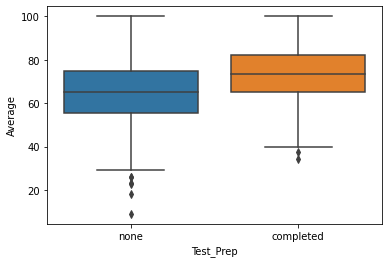

In [57]:
sns.boxplot(y = "Average", x = "Test_Prep", data = df)
plt.show()

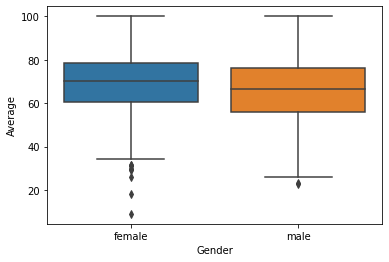

In [58]:
sns.boxplot(y = "Average", x = "Gender", data = df)
plt.show()

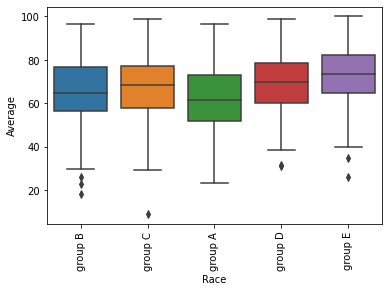

In [59]:
sns.boxplot(y = "Average", x = "Race", data = df)
plt.xticks(rotation = "vertical")
plt.show()